In [5]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np

# Load the dataset
data = pd.read_csv('/kaggle/input/mnist-in-csv/mnist_train.csv')

# Separate the labels and features
labels = data.iloc[:, 0].values
features = data.iloc[:, 1:].values

# Normalize the pixel values to [0, 1]
features = features / 255.0

# Convert to PyTorch tensors
features_tensor = torch.tensor(features, dtype=torch.float32)
labels_tensor = torch.tensor(labels, dtype=torch.long)


In [6]:
class MNISTDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

# Create dataset and dataloader
dataset = MNISTDataset(features_tensor, labels_tensor)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)


In [7]:
import torch.nn as nn
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 10)  # Input layer to hidden layer (10 units)
        self.fc2 = nn.Linear(10, 10)   # Hidden layer to output layer (10 units)

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # Apply ReLU activation
        x = self.fc2(x)  # Output layer
        return x

model = Net()


In [9]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [10]:
num_epochs = 5

for epoch in range(num_epochs):
    running_loss = 0.0
    for inputs, labels in dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(dataloader):.4f}')

Epoch 1/5, Loss: 0.6586
Epoch 2/5, Loss: 0.3122
Epoch 3/5, Loss: 0.2744
Epoch 4/5, Loss: 0.2558
Epoch 5/5, Loss: 0.2447


In [11]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing subsets
train_features, test_features, train_labels, test_labels = train_test_split(features_tensor, labels_tensor, test_size=0.2, random_state=42)

test_dataset = MNISTDataset(test_features, test_labels)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

model.eval()  # Set the model to evaluation mode
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy: {100 * correct / total:.2f}%')

Accuracy: 93.57%


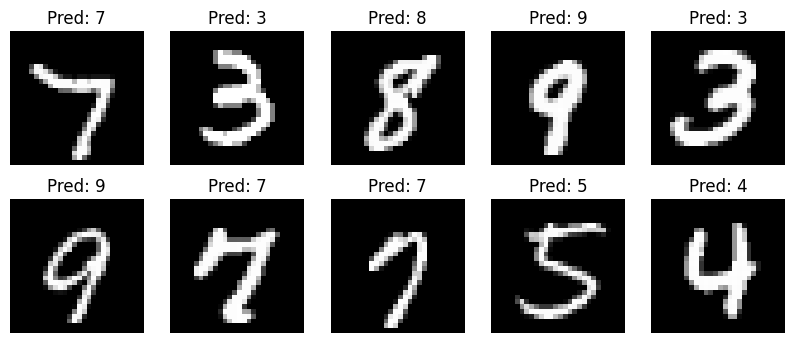

In [12]:
import matplotlib.pyplot as plt

dataiter = iter(test_loader)
images, labels = next(dataiter)
outputs = model(images)

# Plot the first 10 images and their predicted labels
fig = plt.figure(figsize=(10, 4))
for idx in range(10):
    ax = fig.add_subplot(2, 5, idx+1)
    ax.imshow(images[idx].numpy().reshape(28, 28), cmap='gray')
    ax.set_title(f'Pred: {torch.argmax(outputs[idx])}')
    ax.axis('off')

plt.show()